
# Project: Investigate a Dataset (Film Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used in this report is information from approximately 10,000 films, including ratings from the site users, casts, genres, and revenue.    I'll be exploring the data to find the following information: 

1. Who are the top ten most "bankable" film stars (which actors are the most profitable?) 
2. Which directors are the most profitable?
3. Is there any relationship between most profitable actors and most profitable directors?  

Note: I'll be using the definition of "profit" to describe the difference between the adusted-for-inflation revenue, and the adjusted-for-inflation budget. 


This notebook includes some pandas functionality that requires a minimum version of pandas to run successfully - please ensure you are running at least version 0.25 or higher of pandas: 

In [61]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
print ('The current pandas version you are running is:', pd.__version__)
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

The current pandas version you are running is: 1.0.5


<a id='wrangling'></a>
## Data Wrangling

### General Properties

<h2>Initial Data Load</h2>
The initial step is loading the entire CSV.  In order to make the data easier to work with, and more human readable, the initial load will be creating a dataframe using pandas to read the csv, followed by loading the first 5 rows to get a look at the data as it currently exists. 

In [62]:
## assigning a variable for the entirety of the csv. 
total_data = pd.read_csv('tmdb-movies.csv',sep=',', parse_dates=True)
# printing out the first couple of rows. 
total_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


<h2>Intial Data Quality Assessments & Next Steps</h2>
In viewing the data, there are a couple of things that jump out.  

A few columns, including Genre, Production Companies, and Cast, contain multiple values themselves, delimited by the "|" - I will want to break these out into arrays in order to more easily perform tasks on the data within. 

The fields with numbers should probably be checked for their datatype - any strings should be converted if they're going to be used in calculations.   

There are a few columns that likely will not factor into any of the analysis I will be doing, so in order to keep the data concise, I will create a new frame dropping the unneeded columns. 

<h2>Cleaning Data - Step 1: Splitting Strings</h2>
The first steps I'll be taking will be taking the columns in the total_data dataframe with delimited strings and turning them into columns with arrays.   First step is to find all the columns with the '|' character. 

In [63]:
#create a list of columns that are datatype: object 
obj_cols = []
for col in total_data.columns: 
    if total_data[col].dtype == 'object': 
        obj_cols.append(col)

In [64]:
#check it for accuracy
obj_cols

['imdb_id',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies',
 'release_date']

In [65]:
total_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Now I'll search for the '|' character in the obj_cols list.

In [66]:
found = []
for col in obj_cols: 
    if total_data[col].str.contains('|',regex=False).any():
        found.append(col)

In [67]:
found

['cast',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

I can ignore the tagline and overview columns - there's not a need to separate those.  I'm going to remove those from the list. 

In [68]:
found.remove('tagline')
found.remove('overview')

In [69]:
found

['cast', 'director', 'keywords', 'genres', 'production_companies']

I'll create a function that splits the arrays, and then loop through the list to call the function. 

In [70]:
def split_col(col): 
    new_col = total_data[col].str.split('|') #new column value
    total_data[col] = new_col #replace old column with new column
    print(col, ' updated') #make sure they're updated

In [71]:
for item in found:  #loop through the list
    split_col(item)

cast  updated
director  updated
keywords  updated
genres  updated
production_companies  updated


Let's check the new columns to make sure everything looks right. 

In [72]:
total_data[['cast', 'director', 'keywords', 'genres', 'production_companies']].head(5)

,cast,director,keywords,genres,production_companies
0,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...","[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
1,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...","[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro..."
2,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...","[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W..."
3,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]","[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]"
4,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[car race, speed, revenge, suspense, car]","[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ..."


Looking good - let's move on. 

<h2>Cleaning Data - Step 2: Checking datatypes</h2>
Time to move on to the datatypes in the dataset.   Let's check each column's data type and see if anything unusual jumps out. 


In [73]:
#check the datatype of the columns
total_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

All the numeric columns have a numeric datatype - everything looks pretty okay, so I'll move on to dropping some columns I don't need.   I'll create a new dataframe to drop the columns in order to easily undo something if it turns out I need it later. 

<H2>Cleaning Data - Step 3: Check for Outliers</h2>

Since I want to use the revenue and budget, it would be worth it to identify if there are nulls or weird values and how that might impact my dataset. 

In [74]:
#check for nulls 
total_data.isnull().any()


id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

No null values in the budget or revenue columns, so that's good.  The only other thing that might be worth checking because it will mess up calculations is if we have out-of-whack numerical values (zeros, 1s, other outliers).  I'll check for those as well in the four columns with the money figures ('budget', 'revenue', 'budget_adj', 'revenue_adj').  

To improve performance, I'm going to create a new dataframe with just those columns. 

In [75]:
financials = total_data.loc[:,['budget', 'revenue', 'budget_adj', 'revenue_adj']]
financials

,budget,revenue,budget_adj,revenue_adj
0,150000000,1513528810,"137,999,939.28","1,392,445,892.52"
1,150000000,378436354,"137,999,939.28","348,161,292.49"
2,110000000,295238201,"101,199,955.47","271,619,025.41"
3,200000000,2068178225,"183,999,919.04","1,902,723,129.80"
4,190000000,1506249360,"174,799,923.09","1,385,748,801.47"
...,...,...,...,...
10861,0,0,0.00,0.00
10862,0,0,0.00,0.00
10863,0,0,0.00,0.00
10864,0,0,0.00,0.00


Lots of zeros!  I am going to select an output of the entire total_data dataframe with that show me the data for films with a revenue of zero to determine if I even need to keep them.  I'm going to explicitly sort by popularity in order to have a double-check that there aren't any highly popular movies that are showing clear errors. 

While I'm at it, I don't find the viewing of these numbers in scientific format particularly helpful.  I'm going to have pandas default these as floats instead of scientific notation with 2 decimal points, since I know these are financial figures. 

In [76]:
pd.options.display.float_format = '{:,.2f}'.format

In [77]:
low_earners = total_data.loc[total_data['revenue'] == 0]
low_earners.sort_values('popularity',ascending = False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3371,161337,tt2381375,8.41,0,0,Underworld: Endless War,"[Trevor Devall, Brian Dobson, Paul Dobson, Lau...",NaN,[Juno John Lee],NaN,...,Underworld: Endless War is a collection of thr...,18,"[Action, Animation, Horror]",NaN,10/19/11,21,5.90,2011,0.00,0.00
5230,13590,tt0195753,6.67,0,0,Eddie Izzard: Glorious,"[Eddie Izzard, Mac McDonald, Rhona Mitra]",NaN,[Peter Richardson],NaN,...,Eddie Izzard's routine has a loose trajectory ...,99,[Comedy],NaN,11/17/97,11,5.50,1997,0.00,0.00
667,72784,tt1850397,3.28,13000000,0,The Loft,"[Karl Urban, James Marsden, Wentworth Miller, ...",NaN,[Erik Van Looy],The right place to do wrong.,...,"For five men, the opportunity to share a penth...",108,[Thriller],"[Dark Castle Entertainment, Anonymous Content,...",10/14/14,291,6.40,2014,"11,974,183.66",0.00
48,265208,tt2231253,2.93,30000000,0,Wild Card,"[Jason Statham, Michael Angarano, Milo Ventimi...",NaN,[Simon West],Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,"[Thriller, Crime, Drama]","[Current Entertainment, Lionsgate, Sierra / Af...",1/14/15,481,5.30,2015,"27,599,987.86",0.00
688,256092,tt2968804,2.49,12000000,0,Drive Hard,"[Thomas Jane, John Cusack, Zoe Ventoura, Damie...",NaN,[Brian Trenchard-Smith],One Hell of A Ride,...,A former race car driver is abducted by a myst...,96,"[Action, Comedy, Crime]","[Odyssey Media, Silver Wings Films]",5/26/14,52,4.00,2014,"11,053,092.61",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,15412,tt0466460,0.00,0,0,Khosla Ka Ghosla!,"[Anupam Kher, Boman Irani, Parvin Dabas, Tara ...",NaN,[Dibakar Banerjee],A Delhi-based retired middle class man tries t...,...,"Upon retirement, cranky control freak Kamal Ki...",135,[Comedy],[UTV Motion Pictures],9/22/06,10,6.80,2006,0.00,0.00
6551,31329,tt0445570,0.00,0,0,Mon petit doigt m'a dit...,"[Catherine Frot, AndrÃ© Dussollier, GeneviÃ¨ve...",NaN,[Pascal Thomas],NaN,...,No overview found.,105,"[Comedy, Mystery]","[RhÃ´ne-Alpes CinÃ©ma, France2 CinÃ©ma]",4/13/05,13,5.70,2005,0.00,0.00
6080,174323,tt2429074,0.00,0,0,G.B.F.,"[Michael J. Willett, Paul Iacono, Sasha Pieter...",https://www.facebook.com/GBFmovie,[Darren Stein],Being out has never been so in.,...,The bitter fight for supremacy between the thr...,92,[Comedy],"[School Pictures, Parting Shots Media, Logolit...",10/20/13,82,6.10,2013,0.00,0.00
9977,32082,tt0067217,0.00,0,0,The Hospital,"[George C. Scott, Diana Rigg, Richard Dysart, ...",NaN,[Arthur Hiller],"Madness, Murder and Malpractice.",...,Black comedy in which a suicidal doctor strugg...,103,"[Mystery, Comedy, Drama]",[Simcha Productions],12/14/71,10,6.40,1971,0.00,0.00


My theory after seeing the data that the 0 values are due to the films being released in a non-theatrical format (e.g., to DVD, VHS, etc) is confirmed after a couple of spot checks looking up the films on IMDB.com.   I'm okay with eliminating these from the data analysis. 

<H2>Cleaning Data - Step 3: Drop Unneeded Data</h2>
 

Any questions I want to answer with this dataset isn't going to include doing analytics on the imdb ID, or any other ID number - since the dataframe is already indexing it, I don't need to keep those.  Additionally, the websites for each of the films doesn't really interest me.  I'll drop those columns from the dataset I want. 

In [78]:
data = total_data.drop(columns=['id', 'imdb_id', 'homepage'])
#check the new dataframe
data.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,28.42,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],What a Lovely Day.,"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,13.11,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],One Choice Can Destroy You,"[based on novel, revolution, dystopia, sequel,...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],Every generation has a story.,"[android, spaceship, jedi, space opera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,9.34,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


Now I'm going to create a new dataframe excluding the rows with revenue values of 0. 

In [79]:
#checking
test = data.loc[data['revenue'] != 0]
test.sort_values('revenue', ascending = False)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.43,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],Enter the World of Pandora.,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",12/10/09,8458,7.10,2009,"240,886,902.89","2,827,123,750.41"
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],Every generation has a story.,"[android, spaceship, jedi, space opera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
5231,4.36,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",[James Cameron],Nothing on Earth could come between them.,"[shipwreck, iceberg, ship, panic, titanic]","84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,4654,7.30,1997,"271,692,064.21","2,506,405,735.42"
4361,7.64,220000000,1519557910,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",[Joss Whedon],Some assembly required.,"[new york, shield, marvel comic, comic, superh...",When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",[Marvel Studios],4/25/12,8903,7.30,2012,"208,943,741.90","1,443,191,435.21"
0,32.99,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,0.35,200000,3,Dr. Horrible's Sing-Along Blog,"[Neil Patrick Harris, Nathan Fillion, Felicia ...",[Joss Whedon],He has a Ph.D. in horribleness!,"[musical, supervillain]","Dr. Horrible, an aspiring supervillain with hi...",42,"[Adventure, Action, Comedy, Science Fiction, M...",NaN,7/15/08,140,7.70,2008,"202,557.33",3.04
1380,0.10,0,3,The Sentinel,"[Chris Sarandon, Cristina Raines, Martin Balsa...",[Michael Winner],She's living in the gateway to hell.,"[secret society, hell, hellgate, model, demon]",A commitment-shy New York fashion model moves ...,92,"[Horror, Drama, Mystery]",[Universal Pictures],1/7/77,14,6.30,1977,0.00,10.79
10607,0.62,0,3,Soylent Green,"[Charlton Heston, Edward G. Robinson, Leigh Ta...",[Richard Fleischer],What is the secret of Soylent Green?,"[paranoia, dystopia, overpopulation, near future]","In an overpopulated futuristic Earth, a New Yo...",97,"[Mystery, Science Fiction, Thriller]",[Metro-Goldwyn-Mayer (MGM)],4/19/73,124,6.60,1973,0.00,14.73
5067,0.46,6000000,2,Shattered Glass,"[Hayden Christensen, Peter Sarsgaard, ChloÃ« S...",[Billy Ray],NaN,NaN,Fact-based 2003 drama about the young journali...,94,"[Drama, History]","[Lions Gate Films, Cruise/Wagner Productions, ...",11/14/03,46,6.40,2003,"7,112,115.87",2.37


Now when I look, I see some other strange numbers in budget & revenue fields, where we've got some 0s, and some low integers that don't make a lot of sense for budget & revenue.  When looking, however, at the adjusted budget & revenue, those figures appear to be more accurate.   Since I know that I want to compare the profitability of the films over time, I'm okay with using adjusted budget and revenue figures, so I'll just move on to the analysis phase, and if I come across anything weird, go back and look at it again. 

<a id='eda'></a>
## Exploratory Data Analysis



<h3>Research Question 1: Who are the top ten most "bankable" film stars (which actors are the most profitable?)</h3>

Step 1: Let's create a new dataset where we have a "profitability" calculation and isolate it to profitable films. 

In [80]:
#adding a calculated profit column
data['profit_adj'] = data.revenue_adj - data.budget_adj
#trimming down columns
profit = data[['original_title', 'cast', 'director', 'release_year', 'profit_adj', 'genres']]
#including only the positive earning films
profit = profit.loc[profit['profit_adj'] > 0]
#including sorting logic 
profit = profit.sort_values('profit_adj', ascending = False)
profit.head()

,original_title,cast,director,release_year,profit_adj,genres
1329,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
1386,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],2009,"2,586,236,847.52","[Action, Adventure, Fantasy, Science Fiction]"
5231,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",[James Cameron],1997,"2,234,713,671.21","[Drama, Romance, Thriller]"
10594,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",[William Friedkin],1973,"2,128,035,624.57","[Drama, Horror, Thriller]"
9806,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",[Steven Spielberg],1975,"1,878,643,093.71","[Horror, Thriller, Adventure]"


In [81]:
#I want to reindex the dataframe so that it's staying sorted but I can use the index in future analysis. 
profit = profit.reset_index(drop=True)
profit.head()

,original_title,cast,director,release_year,profit_adj,genres
0,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
1,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],2009,"2,586,236,847.52","[Action, Adventure, Fantasy, Science Fiction]"
2,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",[James Cameron],1997,"2,234,713,671.21","[Drama, Romance, Thriller]"
3,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",[William Friedkin],1973,"2,128,035,624.57","[Drama, Horror, Thriller]"
4,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",[Steven Spielberg],1975,"1,878,643,093.71","[Horror, Thriller, Adventure]"


I want to be able to manipulate this list in a few ways in my analysis, so I'm going to write a function to explode and groupby and aggregate and reindex accordingly.  

In [82]:
def table (frame, col, results = 10): 
    df = frame.explode(col) #explode the column to aggregate by
    #retains the profitability as an aggregate - It's all about the money - pivot table will let the 
    df = pd.pivot_table(df, values='profit_adj', index=[col, 'original_title'])
    #grouping by the passed through column 
    df = df.groupby(col).agg(total_profit=('profit_adj', 'sum'))
    df = df.sort_values('total_profit', ascending=False)
    df = df.reset_index().head(results)
    return df

In [83]:
#summing profitability by actors
actors_profit = table(profit, 'cast', 10)
actors_profit

,cast,total_profit
0,Harrison Ford,"12,377,508,130.75"
1,Tom Cruise,"8,433,549,531.04"
2,Tom Hanks,"8,370,587,163.82"
3,Carrie Fisher,"7,270,681,647.57"
4,Emma Watson,"7,237,536,451.22"
5,Daniel Radcliffe,"7,084,303,852.26"
6,Mark Hamill,"7,047,920,048.86"
7,Rupert Grint,"6,979,187,358.13"
8,Ian McKellen,"6,714,761,041.34"
9,Sean Connery,"6,320,178,488.06"


Now to plot the bar graph for total profits by actor: 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

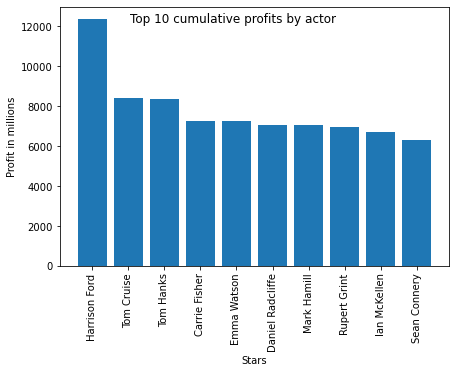

In [84]:
#plotting the total profits by star
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.bar(actors_profit['cast'], actors_profit['total_profit']/1000000)
axes.set_xlabel('Stars')
axes.set_ylabel('Profit in millions')
fig.suptitle('Top 10 cumulative profits by actor')
#rotating the xticks 
plt.xticks(rotation=90)

Looks like Harrison Ford, Tom Cruise, and Tom Hanks are the top 3 most profitable stars based on cumulative profit. 

<h3>Research Question 2: Using the same logic, which directors are the most profitable?</h3>

I'll perform the same actions again, but instead of focusing on the actors, I'll focus on the directors.  

In [85]:
director_profit = table(profit, 'director') #accept the default on the third argument - calling pre-built function
director_profit

,director,total_profit
0,Steven Spielberg,"13,178,356,912.93"
1,James Cameron,"6,296,578,359.74"
2,George Lucas,"5,844,159,207.50"
3,Peter Jackson,"5,653,537,489.22"
4,Chris Columbus,"4,389,185,244.98"
5,Robert Zemeckis,"4,335,995,165.48"
6,Michael Bay,"3,958,675,886.72"
7,Wolfgang Reitherman,"3,490,935,373.23"
8,David Yates,"3,394,430,107.98"
9,Tim Burton,"3,304,607,342.88"


Now to similarly graph the results. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

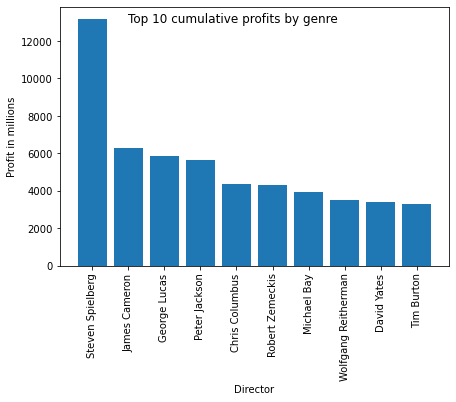

In [86]:
#plotting the total profits by star
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.bar(director_profit['director'], director_profit['total_profit']/1000000)
axes.set_xlabel('Director')
axes.set_ylabel('Profit in millions')
fig.suptitle('Top 10 cumulative profits by genre')
#rotating the xticks 
plt.xticks(rotation=90)

Steven Spielberg is clearly the most profitable director.  I'm interested finally in seeing if the most profitable actors have worked more frequently with Spielberg or another director that might show a relationship. 

<h3>Research question 3:  Is there a relationship between most profitable director and most profitable actor?</h3>

I'd expect to see some interesting data regarding which director has directed the most profitable actors, or which director has the widest <i>range</i> of profitable actors.  It would also be interesting to see which directors might be profitable but not have very profitable actors in their dataset. 

The first thing I want to do is break out the cast members and the directors out of the original profit dataframe. 

In [87]:
#exploding out cast members and the director list
cast_dir = profit.explode('cast')
cast_dir = cast_dir.explode('director')
cast_dir


,original_title,cast,director,release_year,profit_adj,genres
0,Star Wars,Mark Hamill,George Lucas,1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
0,Star Wars,Harrison Ford,George Lucas,1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
0,Star Wars,Carrie Fisher,George Lucas,1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
0,Star Wars,Peter Cushing,George Lucas,1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
0,Star Wars,Alec Guinness,George Lucas,1977,"2,750,136,650.92","[Adventure, Action, Science Fiction]"
...,...,...,...,...,...,...
3772,Hross Ã­ oss,Ingvar Eggert SigurÃ°sson,Benedikt Erlingsson,2013,0.94,"[Drama, Romance, Comedy]"
3772,Hross Ã­ oss,Charlotte BÃ¸ving,Benedikt Erlingsson,2013,0.94,"[Drama, Romance, Comedy]"
3772,Hross Ã­ oss,Steinn Ãrmann MagnÃºsson,Benedikt Erlingsson,2013,0.94,"[Drama, Romance, Comedy]"
3772,Hross Ã­ oss,KristbjÃ¶rg Kjeld,Benedikt Erlingsson,2013,0.94,"[Drama, Romance, Comedy]"


I want to get a data readout of the frequency of cast members to directors, so I'll build and filter a new crosstab to show me that information.   I will also need to refine the data to get only a readout of the top 10 directors and profitable actors for my research question. 

In [88]:
#crosstab will get me the frequency of cast members per director
freq = pd.crosstab(cast_dir.director, cast_dir.cast)

In [89]:
#masking data to filter out non-relevant information
directors = freq.index.isin(director_profit.director)
actors = actors_profit.cast
freq_actor = freq[directors]
freq_actor = freq_actor[actors]
freq_actor

cast,Harrison Ford,Tom Cruise,Tom Hanks,Carrie Fisher,Emma Watson,Daniel Radcliffe,Mark Hamill,Rupert Grint,Ian McKellen,Sean Connery
director,,,,,,,,,,
Chris Columbus,0,0,0,0,2,2,0,2,0,0
David Yates,0,0,0,0,4,4,0,4,0,0
George Lucas,1,0,0,1,0,0,1,0,0,0
James Cameron,0,0,0,0,0,0,0,0,0,0
Michael Bay,0,0,0,0,0,0,0,0,0,1
Peter Jackson,0,0,0,0,0,0,0,0,6,0
Robert Zemeckis,1,0,3,0,0,0,0,0,0,0
Steven Spielberg,4,2,4,0,0,0,0,0,0,1
Tim Burton,0,0,0,0,0,0,0,0,0,0


Just by looking at the data, I can see clearly that there are some recurrences of actors and directors, and I'd like to see the visualization of those categorical variables.   A stacked bar chart should give me an idea of what I'm looking for.  I want to see who has the biggest variation of actors as items in their bar graph - something that shows the range of high-profit actors for each director. 

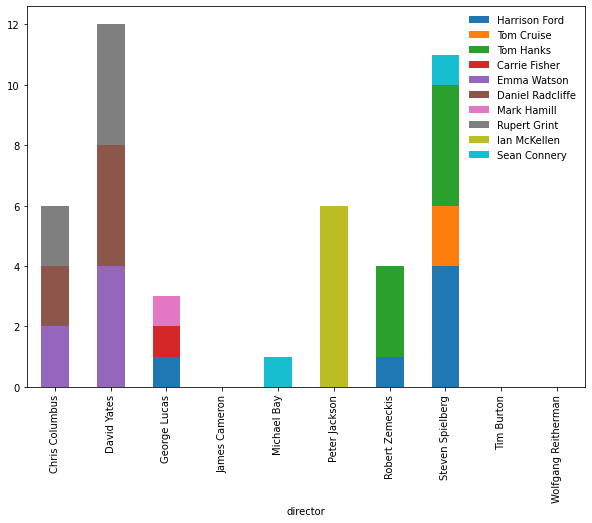

In [90]:
#basic stacked bar chart, making size bigger for ease of reading as well as preventing label overlap. 
stacked_chart = freq_actor.loc[:, actors].plot.bar(figsize = (10,7), stacked=True)
stacked_chart.legend(loc='best', frameon=False)

<a id='conclusions'></a>
## Conclusions

In reviewing the film profitability data, I can clearly see that Steven Spielberg is the most cumulatively profitable director - the chart shows him as significantly higher than his other 9 peers.  While the top ten cumulatively profitable actors are distributed a little more evenly, with further analysis, there is a clear illustration that the top 3 most cumulatively profitable actors of Harrison Ford, Tom Cruise, and Tom Hanks are predominantly linked with Steven Spielberg as a director.  While it would not be accurate to say as the data will not prove causation, that "working on a Steven Spielberg film will make you a profitable actor," Spielberg has worked with the widest range (4/10) of profitable actors of the directors on the list. 

Some interesting other data is that Emma Watson, Daniel Radcliffe, and Rupert Grint, while appearing on the most profitable list, only appear together.  If I were going to do further analysis into the impacts of sequels on cumulative profitability, I would hypothesize that Chris Columbus and David Yates were directors on a set of sequels, based on the shared and exclusive common cast. 


<a id='references'></a>
## References

<ul>
<li>https://geeksforgeeks.org</li>
<li>https://pandas.pydata.org/docs/user_guide/index.html</li>
<li>https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/</li>
<li>https://Matplotlib.org/gallery/index.html</li>
<li>https://www.dataquest.io/blog/numpy-cheat-sheet/</li>
<li>https://Imdb.com</li>
<li>https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet</li>
<li>https://www.kaggle.com/adilaliyev/pandas-cheatsheet-for-sql-people</li>